## “뉴런 → 은닉층 → 비선형성 → 딥러닝 학습(Forward/Backward/Update)” 흐름

### 1. 뉴런(Neuron) 계산: 𝑧=𝑊𝑥+𝑏  → 활성화 

- 뉴런: 입력을 가중치로 “합쳐서(z)” → 활성화 함수로 “출력(a)”
- 활성화 함수가 없으면(선형이면) 여러 층을 쌓아도 결국 선형결합- 뉴런: 입력을 가중치로 “합쳐서(z)” → 활성화 함수로 “출력(a)”
- 활성화 함수가 없으면(선형이면) 여러 층을 쌓아도 결국 선형결합.

In [9]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 입력 x(특성 2개), 가중치 W(2개), 편향 b(1개)
x = np.array([2.0, -1.0])  #입력 좌표
W = np.array([0.7, -0.4])  # 법선 벡터(결정경계의 방향)
b = 0.1

z = np.dot(W, x) + b
a = sigmoid(z)

print("z(가중합) =", z)
print("a(활성화 출력) =", a)


z(가중합) = 1.9
a(활성화 출력) = 0.8698915256370021


- numpy/matplotlib으로 실제 그래프를 직접 그려서 보여주기

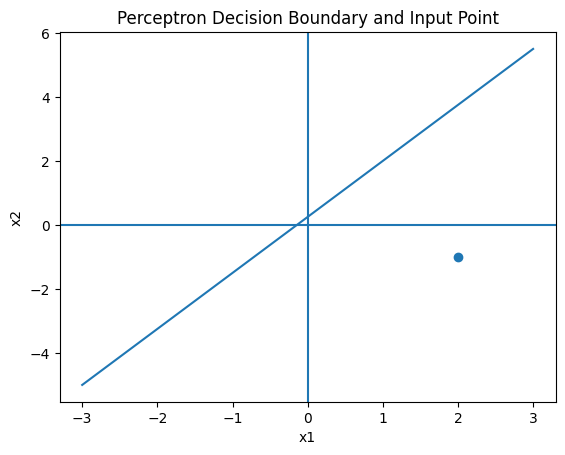

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Given perceptron parameters
W = np.array([0.7, -0.4])
b = 0.1
x = np.array([2.0, -1.0])

# Create grid for decision boundary
x1 = np.linspace(-3, 3, 100)
x2 = (0.7 * x1 + b) / 0.4  # from 0.7*x1 - 0.4*x2 + 0.1 = 0

plt.figure()
plt.plot(x1, x2)                 # decision boundary
plt.scatter(x[0], x[1])          # input point
plt.axhline(0)
plt.axvline(0)

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Perceptron Decision Boundary and Input Point")

plt.show()


In [ ]:
# 그래프 해석
# 대각선 직선 = 결정 경계 : 이 직선은 다음 식입니다:0.7𝑥1−0.4𝑥2+0.1=0
# 이 선 위에 있으면 → 출력 경계
# 선의 한쪽 → 클래스 1
# 반대쪽 → 클래스 0
# 👉 퍼셉트론은 이 직선을 기준으로 공간을 둘로 자릅니다
# 점 하나 = 입력 데이터, 점의 좌표는:𝑥=(2, −1)
# 이 점은 직선의 한쪽에 명확히 떨어져 있음→ 실제 계산값 𝑧=1.9>0
# → 퍼셉트론 출력 = 1
# 가중치 W의 기하학적 의미
# 𝑊=(0.7,−0.4) 는
# 👉 이 직선에 수직인 방향

# 퍼셉트론은 사실상:점을 이 방향으로 “쭉 투영”해서 0보다 크냐 작냐를 보는 것
# 퍼셉트론 = 직선 하나로 공간을 나누는 분류기
# 그래서:AND, OR → 가능 , XOR → 불가능 (직선 하나로 못 나눔)

### 2. 은닉층·비선형성이 왜 필요한가: XOR 문제로 확인

- XOR 데이터(선형 분리 불가능)

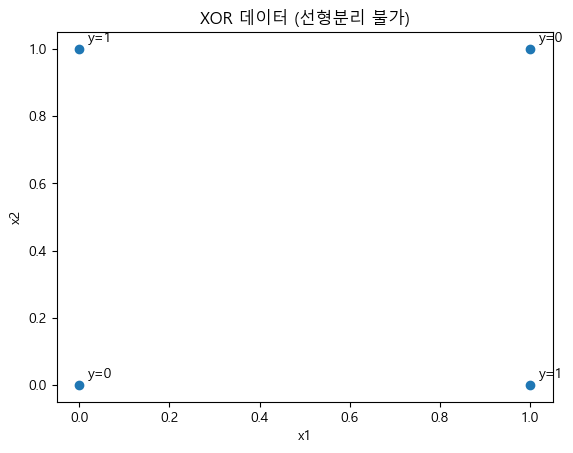

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rc

rc('font', family='Malgun Gothic')   # 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False

# XOR: (0,0)->0, (0,1)->1, (1,0)->1, (1,1)->0
X = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=float)
y = np.array([[0],[1],[1],[0]], dtype=float)

plt.figure()
plt.scatter(X[:,0], X[:,1])
for i in range(len(X)):
    plt.text(X[i,0]+0.02, X[i,1]+0.02, f"y={int(y[i,0])}")
plt.title("XOR 데이터 (선형분리 불가)")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()
